In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#installing the segmentation module
!pip install git+https://github.com/qubvel/segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-_rn4xp18
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-_rn4xp18
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 50 kB 5.1 MB/s 
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-py3-none-any.whl size=33809 sha256=8b1ade267ddeedaf007c0c3f0fd9729f934e0ecff4d0d7ffde44296f96929baf
  Stored in directory: /tmp/pip-ephem-wheel-cache-pv1_q3gg/wheels/91/c4/cb/a53fedf4b956b22b486a1f135859dacfd3809d410e34e7906c
Successfully built segmentation-models


In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/14241/862020/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1671431604&Signature=HaDp6UcdUpBw6Qdmj0inXbq6QzVQFtnkhfd3RJnaTw%2Bu%2FvIXhPy5wQrTIgolOlUHxRStvosm4s66dOCLNYTwQ7QnFL6Dq9pptcUQlXTbUnV7Dgf26aW1%2FfB03U2ww5xxaGcLxhGMdNveoR5N37NQXYrtZ5J8DJd%2B2OIyj2sfnyHOw5iuQCKbnB3Mkg6Abz9TNVsGKsM9GY29CuH8UQkkfJC2gQwFKCAdHKdsxz1gvY9CjTVQJ1KYo1xxHUq7FHKEETDRGQbgrYXKwK4eoRlJfQ9KCbkPCWu%2F1H7J45oHynPSTUAOmKPhFQ8PNlBxUmqUkbcqwSiNzJhbdlekHNkx2g%3D%3D&response-content-disposition=attachment%3B+filename%3Dseverstal-steel-defect-detection.zip" -c -O 'severstal-steel-defect-detection.zip'

--2022-12-17 17:06:56--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/14241/862020/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1671431604&Signature=HaDp6UcdUpBw6Qdmj0inXbq6QzVQFtnkhfd3RJnaTw%2Bu%2FvIXhPy5wQrTIgolOlUHxRStvosm4s66dOCLNYTwQ7QnFL6Dq9pptcUQlXTbUnV7Dgf26aW1%2FfB03U2ww5xxaGcLxhGMdNveoR5N37NQXYrtZ5J8DJd%2B2OIyj2sfnyHOw5iuQCKbnB3Mkg6Abz9TNVsGKsM9GY29CuH8UQkkfJC2gQwFKCAdHKdsxz1gvY9CjTVQJ1KYo1xxHUq7FHKEETDRGQbgrYXKwK4eoRlJfQ9KCbkPCWu%2F1H7J45oHynPSTUAOmKPhFQ8PNlBxUmqUkbcqwSiNzJhbdlekHNkx2g%3D%3D&response-content-disposition=attachment%3B+filename%3Dseverstal-steel-defect-detection.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.251.18.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1684204253 (1.6G) [application/zip]
Saving to: ‘severstal-steel-defec

In [ ]:
#unzipping the data
!unzip '/content/severstal-steel-defect-detection.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train_images/99f75320d.jpg  
  inflating: train_images/99f9d2375.jpg  
  inflating: train_images/99fd3c6f5.jpg  
  inflating: train_images/9a016fe15.jpg  
  inflating: train_images/9a064450d.jpg  
  inflating: train_images/9a08c2783.jpg  
  inflating: train_images/9a18e4457.jpg  
  inflating: train_images/9a1f7c238.jpg  
  inflating: train_images/9a2523ce9.jpg  
  inflating: train_images/9a3e774ff.jpg  
  inflating: train_images/9a5e9e77c.jpg  
  inflating: train_images/9a5f7a855.jpg  
  inflating: train_images/9a62177bb.jpg  
  inflating: train_images/9a67575cf.jpg  
  inflating: train_images/9a6ac5406.jpg  
  inflating: train_images/9a70057c0.jpg  
  inflating: train_images/9a72fd89e.jpg  
  inflating: train_images/9a75974ba.jpg  
  inflating: train_images/9a762b892.jpg  
  inflating: train_images/9a7b2f3af.jpg  
  inflating: train_images/9a7b427b4.jpg  
  inflating: train_images/9a81a8056.jpg  
  inflating: train_images

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import pickle
import matplotlib.patches as patches
import re
import random
from sklearn.model_selection import train_test_split
import cv2
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.utils import plot_model
from PIL import Image
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Model,load_model
from keras.regularizers import l2
import datetime
%load_ext tensorboard
import segmentation_models as sm
from segmentation_models import get_preprocessing
import imgaug.augmenters as iaa
sm.set_framework('tf.keras')
sm.framework()
from tensorflow import keras
from segmentation_models.metrics import iou_score

Segmentation Models: using `keras` framework.


In [ ]:
train_images_path = '/content/train_images'
train_df = pd.read_csv('/content/train.csv') 

In [ ]:
with open('/content/train.pkl','rb') as f:
    train=pickle.load(f)

In [ ]:
train.head()

,image_id,rle_1,rle_2,rle_3,rle_4,defect,stratify,defect_1,defect_2,defect_3,defect_4,total_defects
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,,1,1,1,0,0,0,1
1,00031f466.jpg,,,,,0,0,0,0,0,0,0
2,000418bfc.jpg,,,,,0,0,0,0,0,0,0
3,000789191.jpg,,,,,0,0,0,0,0,0,0
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,,1,3,0,0,1,0,1


In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train,x_test=train_test_split(train,test_size=0.10,stratify=train['stratify'],random_state=0)
print("x_train {}".format(x_train.shape),"x_test {}".format(x_test.shape))
print("="*100)

x_train (11311, 12) x_test (1257, 12)


In [ ]:
train_1=x_train[x_train['defect_1']==1][['image_id','rle_1']].rename(columns={'image_id':'image_id','rle_1':'rle'})
train_2=x_train[x_train['defect_2']==1][['image_id','rle_2']].rename(columns={'image_id':'image_id','rle_2':'rle'})
train_3=x_train[x_train['defect_3']==1][['image_id','rle_3']].rename(columns={'image_id':'image_id','rle_3':'rle'})
train_4=x_train[x_train['defect_4']==1][['image_id','rle_4']].rename(columns={'image_id':'image_id','rle_4':'rle'})
print("train_1 {}".format(train_1.shape)," train_2 {}".format(train_2.shape)," train_3 {}".format(train_3.shape)," train_4 {}".format(train_4.shape))
print("="*100)

train_1 (807, 2)  train_2 (224, 2)  train_3 (4638, 2)  train_4 (723, 2)


In [ ]:
test_1=x_test[x_test['defect_1']==1][['image_id','rle_1']].rename(columns={'image_id':'image_id','rle_1':'rle'})
test_2=x_test[x_test['defect_2']==1][['image_id','rle_2']].rename(columns={'image_id':'image_id','rle_2':'rle'})
test_3=x_test[x_test['defect_3']==1][['image_id','rle_3']].rename(columns={'image_id':'image_id','rle_3':'rle'})
test_4=x_test[x_test['defect_4']==1][['image_id','rle_4']].rename(columns={'image_id':'image_id','rle_4':'rle'})
print("test_1 {}".format(test_1.shape)," test_2 {}".format(test_2.shape)," test_3 {}".format(test_3.shape)," test_4 {}".format(test_4.shape))

test_1 (90, 2)  test_2 (23, 2)  test_3 (512, 2)  test_4 (78, 2)


In [ ]:
#https://www.kaggle.com/paulorzp/rle-functions-run-lenght-encode-decode
def rle_to_mask(rle):
# CONVERT RLE TO MASK
   if (pd.isnull(rle))|(rle=='')|(rle=='-1'):
       return np.zeros((256,800),dtype=np.uint8) #If the EncodedPixels string is empty an empty mask is returned
   height=256
   width=1600
   mask=np.zeros(width*height,dtype=np.uint8)
   array=np.asarray([int(x) for x in rle.split()])
   starts=array[0::2]-1
   lengths=array[1::2]
   for index,start in enumerate(starts):
      mask[int(start):int(start+lengths[index])]=1
   return mask.reshape((height,width),order='F')[::,::2]

In [ ]:
"""
Implementing custom data generator
#https://towardsdatascience.com/implementing-custom-data-generators-in-keras-de56f013581c
#https://www.kaggle.com/cdeotte/keras-unet-with-eda
"""
class train_DataGenerator(keras.utils.Sequence):
    def __init__(self,dataframe,batch_size=1,shuffle=True,preprocess=None,info={}):
     self.batch_size = batch_size
     self.df = dataframe
     self.indices = self.df.index.tolist()
     self.preprocess = preprocess
     self.shuffle = shuffle
     self.on_epoch_end()
    def __len__(self):
     return len(self.indices) // (self.batch_size)
    def __getitem__(self, index):
     index = self.index[index * self.batch_size:(index + 1) * self.batch_size]
     batch = [self.indices[k] for k in index]
     X, y = self.__get_data(batch)
     return X, y
    def on_epoch_end(self):
     self.index = np.arange(len(self.indices))
     if self.shuffle == True:
        np.random.shuffle(self.index)
    def __get_data(self, batch):
     train_datagen = ImageDataGenerator()
#https://www.geeksforgeeks.org/python-select-random-value-from-a-list/
     X=np.empty((self.batch_size,256,800,3),dtype=np.float32) # image place-holders
     Y=np.empty((self.batch_size,256,800,1),dtype=np.float32)# 1 mask place-holders
     for i,id in enumerate(batch):
      X[i,] = Image.open('/content/train_images/' + str(self.df['image_id'].loc[id])).resize((800,256))
      Y[i,:,:,0]=rle_to_mask(self.df['rle'].loc[id])
      t=random.choice([0,10,20,30,40])
      z=random.choice([0.8,1])
      flip=random.choice(['True','False'])
      param={'tx':t,'ty':t,'zx':z,'zy':z,}
      for i,e in enumerate(X):
          X[i] = train_datagen.apply_transform(e,transform_parameters=param)
      for i,f in enumerate(Y):
          Y[i] = train_datagen.apply_transform(f,transform_parameters=param)
      if self.preprocess!=None: X = self.preprocess(X)
      return X,Y

In [ ]:
# Implementing custom data generator
#https://towardsdatascience.com/implementing-custom-data-generators-in-keras-de56f013581c
class test_DataGenerator(keras.utils.Sequence):
  def __init__(self,dataframe,batch_size=1,shuffle=False,preprocess=None,info={}):
   self.batch_size = batch_size
   self.df = dataframe
   self.indices = self.df.index.tolist()
   self.preprocess = preprocess
   self.shuffle = shuffle
   self.on_epoch_end()
  def __len__(self):
   return len(self.indices) // (self.batch_size)
  def __getitem__(self, index):
   index = self.index[index * self.batch_size:(index + 1) * self.batch_size]
   batch = [self.indices[k] for k in index]
   X, y = self.__get_data(batch)
   return X, y
  def on_epoch_end(self):
   self.index = np.arange(len(self.indices))
   if self.shuffle == True:
     np.random.shuffle(self.index)
  def __get_data(self, batch):
   X = np.empty((self.batch_size,256,800,3),dtype=np.float32) # image place-holders
   Y = np.empty((self.batch_size,256,800,1),dtype=np.float32)# 1 mask place-holders
   for i, id in enumerate(batch):
     X[i,] = Image.open('/content/train_images/' + str(self.df['image_id'].loc[id])).resize((800,256))
     Y[i,:,:,0]=rle_to_mask(self.df['rle'].loc[id])
    # preprocess input
   if self.preprocess!=None: X = self.preprocess(X)
   return X,Y

In [ ]:
!wget --header="Host: doc-08-ak-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Cookie: AUTH_ahrnnkdpfjmgo846jc7prsege2kj9bt3_nonce=sh2t0ssihsj76" --header="Connection: keep-alive" "https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ijahn72mu00ducknfmojh6pi95vkbbmn/mu41lnfjl5hupvbpllr3qte4o9eqe8qs/1671297000000/13192374579868843205/13192374579868843205/1kph6yXeyohfU_cMF69iBRBp3t3Ahiyie?e=download&ax=ALjR8sykV-UTjCxYoSnqnyQd0RYLKq3gnkBdmKTR5dG4rklIQ45Z4307MIIBxDTJ-Mf4e4dy1LOwA0--wUrDx-s0O60GLuo1wuU8YWArp1reabsdHm9s5gahnmz4ZrvgvSLTH4W_EykOit_NvB-HP2ajKsaEC8EL4gmmoQSkXq1PEAQUiAUcQepTxQ5pin0UpaLDTWkTeu8ArgGGPk8SlPYOhDXZ3Dhv-L9NnJRSSo0wJmv5i94nHl_ycBH2ha3GjAQ_yGt-LNXFr-OrDOZUsiNMIIAmKEc1RlVpbMbyPDMuyRS_cJ5yxpyqvnvnoywx7aGywtGTYOPFR5Tl_kaHLbFsBptMWNGt8AbZJQ5-N1GdcVBfn0zqxKpTA-v8nH8sOhXv24LCsTWjpKEMPRRKJzjBW_svfDBIaoAspAGntndE-aHi4SOKyNlF_DfaD-fQJdikhJLBB3n6xm67x7_fIUZMh3nxWemlDjH91TdwDEhFAJ7jcW7FLodmDnhHNCtwvrSlO-BTdJZCEW70UxuhisnkBIqKO2GXAx6q1QA8gB5szJEVhamigSUMtMK29guUxAYN2XHim4s7haub5tuYFxHJRsMJcwHcLqFZvh4hDz8ox1TQb1UvgSTDQ0-sYXXXi-Njp-gshQjk-NWMhnccyGJdPK06a25RREMxDHI2CK1QGqjCh_I5-1bH8hGZkPXWeQO3mUhhcEXEF7esPX48aKqSY5s6wgOy3idhp6xPFh7UtQbsgHWhxWLNQwpTwBpV6spV1uQ2OaH2QFopeIhNdybUJ-rZHL1KiSf2Kh25f62E-G0EvCrufRGWZ3nRwblgbgL_bHlH4SaG8PSd7cU5MkwVW3h6QtJccJqUCeRJPFeC7Vu1NVgpeZBtR5dkhCoth4_2L5Mr1pnACf4bQBrkBlv7Y5k0_91_eLG870-mMIIi&uuid=b6c3a34d-7063-4875-81d9-89c3aeeff4ee&authuser=0&nonce=sh2t0ssihsj76&user=13192374579868843205&hash=l6tmbqpmvlk9ddh65pko00vv05g5d322" -c -O 'model_unet1.h5'

--2022-12-17 17:11:08--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ijahn72mu00ducknfmojh6pi95vkbbmn/mu41lnfjl5hupvbpllr3qte4o9eqe8qs/1671297000000/13192374579868843205/13192374579868843205/1kph6yXeyohfU_cMF69iBRBp3t3Ahiyie?e=download&ax=ALjR8sykV-UTjCxYoSnqnyQd0RYLKq3gnkBdmKTR5dG4rklIQ45Z4307MIIBxDTJ-Mf4e4dy1LOwA0--wUrDx-s0O60GLuo1wuU8YWArp1reabsdHm9s5gahnmz4ZrvgvSLTH4W_EykOit_NvB-HP2ajKsaEC8EL4gmmoQSkXq1PEAQUiAUcQepTxQ5pin0UpaLDTWkTeu8ArgGGPk8SlPYOhDXZ3Dhv-L9NnJRSSo0wJmv5i94nHl_ycBH2ha3GjAQ_yGt-LNXFr-OrDOZUsiNMIIAmKEc1RlVpbMbyPDMuyRS_cJ5yxpyqvnvnoywx7aGywtGTYOPFR5Tl_kaHLbFsBptMWNGt8AbZJQ5-N1GdcVBfn0zqxKpTA-v8nH8sOhXv24LCsTWjpKEMPRRKJzjBW_svfDBIaoAspAGntndE-aHi4SOKyNlF_DfaD-fQJdikhJLBB3n6xm67x7_fIUZMh3nxWemlDjH91TdwDEhFAJ7jcW7FLodmDnhHNCtwvrSlO-BTdJZCEW70UxuhisnkBIqKO2GXAx6q1QA8gB5szJEVhamigSUMtMK29guUxAYN2XHim4s7haub5tuYFxHJRsMJcwHcLqFZvh4hDz8ox1TQb1UvgSTDQ0-sYXXXi-Njp-gshQjk-NWMhnccyGJdPK06a25RREMxDHI2CK1QGqjCh_I5-1bH8hGZkPXWeQO3mUhhcEXEF7esPX48aKqSY5s6wgOy3idhp6xPFh

In [ ]:
!wget --header="Host: doc-0s-ak-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Cookie: AUTH_ahrnnkdpfjmgo846jc7prsege2kj9bt3=13192374579868843205|1671297000000|jvtsiubdnen3qvp4h3r0l5rh3b2fv6rh" --header="Connection: keep-alive" "https://doc-0s-ak-docs.googleusercontent.com/docs/securesc/ijahn72mu00ducknfmojh6pi95vkbbmn/fa33r3i0tif62nk4jqt2oauf73g26u79/1671297075000/13192374579868843205/13192374579868843205/18FNIlojrUdKurqjiN00Aa9zCKoEh2zMs?e=download&ax=ALjR8szMMYzTzRk_IWG3a6Ni6Hfq9ew6lCBNlHeEWAOAKRdXdMNKevgBOXchYQQNgKUnhIaI9wiQnyAM_4M6N64k9Lz9v6C5PUH72-tLVsjCAh7T-h-jYbjXste5u71JRdFQjTuPahEJBN5Jl1abCCOKxogBx5BqME_TAFk4PL9MNFY1Zw_egeWHdfQ34wqgZLvV_bZXjK-FPZ9bEoXtyBF0uJHD_GppSEooCOLk6gCX8x_a8qRCsxorCLivBaKa1ItzQN-AGPdyI9YcjgGo2aL-2jtltyGAXZjmXDWAKKdT6LAg5MsYpR4UL4aWFUSI73gOsDrHTBxcbOLU_kEzVUgjraiss39g7zao2dooSMvyGi6cnl80WkZT-HWofjXlc-yFvh4X60SimNHFVinsWTDSR19KqpJMjpmC8373G46kHHxKHojeC30O-7GQo6P3UpYxQTQCnlFBDAV6Q5urZtRr8VMCn1tUvXaJEOZXXHXGQkcUZE7egep1eYU_6u_71y45mxhhQd2gjYVAPH3FllJWnpv0nGMGbDDKNNiFn0DFueCp-pNFxT6ujUO84_QfwbgAiv2IlvnTEScV_1r6nZMuEwInd03kfd75qdLjyPNjmJL2A8iz7UMXyHbHXWpOHyvgElcA30wzEGp3fnsGy0vnhb2ETdL1V7YvQnBmJjO3xXoX5jJ8ZZeC0fYor7K7zO3X1eggOUXxxwEExbHY7qiVaasSU4gs3TFF_gBYEl8sTQ_X5AG8saeamOeAdCPgHZ9ArXchDSvl0D_TTWhC3gTkoYHLu91eEmZ8l_9U2Og8HNDgqm51GwCvSR1xXJ--UfFaw0042RunY_T6sh2SoIrwMAUTm8DIjD0bdf860w6VSV5-Pg-QgfE8yk9WRg1PEwPe3dY_F2Ebs5COaGiy8Qug7qMfnNaG2vY5_9wUKTVn&uuid=6dd21cb7-fcc4-47b5-930f-a80516c1d906&authuser=0" -c -O 'model_unet2.h5'

--2022-12-17 17:11:48--  https://doc-0s-ak-docs.googleusercontent.com/docs/securesc/ijahn72mu00ducknfmojh6pi95vkbbmn/fa33r3i0tif62nk4jqt2oauf73g26u79/1671297075000/13192374579868843205/13192374579868843205/18FNIlojrUdKurqjiN00Aa9zCKoEh2zMs?e=download&ax=ALjR8szMMYzTzRk_IWG3a6Ni6Hfq9ew6lCBNlHeEWAOAKRdXdMNKevgBOXchYQQNgKUnhIaI9wiQnyAM_4M6N64k9Lz9v6C5PUH72-tLVsjCAh7T-h-jYbjXste5u71JRdFQjTuPahEJBN5Jl1abCCOKxogBx5BqME_TAFk4PL9MNFY1Zw_egeWHdfQ34wqgZLvV_bZXjK-FPZ9bEoXtyBF0uJHD_GppSEooCOLk6gCX8x_a8qRCsxorCLivBaKa1ItzQN-AGPdyI9YcjgGo2aL-2jtltyGAXZjmXDWAKKdT6LAg5MsYpR4UL4aWFUSI73gOsDrHTBxcbOLU_kEzVUgjraiss39g7zao2dooSMvyGi6cnl80WkZT-HWofjXlc-yFvh4X60SimNHFVinsWTDSR19KqpJMjpmC8373G46kHHxKHojeC30O-7GQo6P3UpYxQTQCnlFBDAV6Q5urZtRr8VMCn1tUvXaJEOZXXHXGQkcUZE7egep1eYU_6u_71y45mxhhQd2gjYVAPH3FllJWnpv0nGMGbDDKNNiFn0DFueCp-pNFxT6ujUO84_QfwbgAiv2IlvnTEScV_1r6nZMuEwInd03kfd75qdLjyPNjmJL2A8iz7UMXyHbHXWpOHyvgElcA30wzEGp3fnsGy0vnhb2ETdL1V7YvQnBmJjO3xXoX5jJ8ZZeC0fYor7K7zO3X1eggOUXxxwEExbHY7qiVaasSU4gs3TFF_gBYEl

In [ ]:
!wget --header="Host: doc-0o-ak-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Cookie: AUTH_ahrnnkdpfjmgo846jc7prsege2kj9bt3=13192374579868843205|1671297000000|jvtsiubdnen3qvp4h3r0l5rh3b2fv6rh" --header="Connection: keep-alive" "https://doc-0o-ak-docs.googleusercontent.com/docs/securesc/ijahn72mu00ducknfmojh6pi95vkbbmn/l8oodj8qvifj8ma5lvadlaifd7mcq3sg/1671297075000/13192374579868843205/13192374579868843205/18G4cYbQXyXUPKdT9V0wtjLtLHqaCaIEF?e=download&ax=ALjR8syirinfo1Pxf9tUU6SJaLQhdgsia0dCxKjUR1K8Uph67Tosv6DhuQTlKqESPyGFuUjWAUw7oQcolLpDmmFgZM48O9wnK8ylQqqVutJke1mbamIH3aaiO1EWSdaN-CMaQVHfhUNavkXeVJzGLAPbLrx16d1wLLFoFGauGREHANNa3Pa6eb6NQZsI0_JcNqB8yM2UkseaoWSoCXK7RbzyhQi04IZ2YaZ6nf_-gVdlx2zff5Sb9aksbXUqKfhUiHqkq7LHMmj1-YwO2uczhQ9a7MNhdg-w2sGA7g0-Lr6wQTEK5dA05yYsD4Nf3Wg-_4H_zx-M87u-Hb6_88fcNMbeKucJ-iVODHB9fIFFm5jtH7BOMNIv91mdig7Cdm1E5-hrAbVPyiXu7xevZG5tNT7O6N0Yz9ZtDlmG5OZuA2noIaZd8HjWFON3v5YDpgebBn-3Bg2hwzw_HQw7-DKF_SsMY1cAjalb5mLQDV2lWBtnwfmrV6xA-59K2uqW65rWvWmHCuexlUuK_uonsNnb1QdRbkG3WhWFfHIGIWPJDo706mPHjWpkSXtubPRgFTZK5LnTQ1BJixNO0ty0X3xBqWucZ8-P2N-JUTIDqZGrc8mKdrw2-iF-X4r4gwiaf_CPdedrphY0pw0a8EuZsS1hQSwIus8BJmcCpS0l8lqQ41ij3gLAXpnPSkINvQyOAgPEBPQ_J9H9TF9VoTJEA2q_O1tdA6bT-PISAmGuFu59m96yxlDQpqJPDp5KZ-lJmtK2qNjPkt8jT056QOgqfxiTZsTsKuwhPN46nPSpOpudWceFBeJdwH-ZX1XkQCjedi0NF5WzCRMF0OH-ugO-es7O9kr_O_Z3t5oYC5gycLBupLL4xNLWuskAppXvWUDc1eXSuIz1juNeNTdvJHdB9iN6BbqszFKCUHwROElF8rE7ZRuX&uuid=3cfca2ff-8748-48a6-ac7a-2293c447ff95&authuser=0" -c -O 'model_unet3.h5'

--2022-12-17 17:12:22--  https://doc-0o-ak-docs.googleusercontent.com/docs/securesc/ijahn72mu00ducknfmojh6pi95vkbbmn/l8oodj8qvifj8ma5lvadlaifd7mcq3sg/1671297075000/13192374579868843205/13192374579868843205/18G4cYbQXyXUPKdT9V0wtjLtLHqaCaIEF?e=download&ax=ALjR8syirinfo1Pxf9tUU6SJaLQhdgsia0dCxKjUR1K8Uph67Tosv6DhuQTlKqESPyGFuUjWAUw7oQcolLpDmmFgZM48O9wnK8ylQqqVutJke1mbamIH3aaiO1EWSdaN-CMaQVHfhUNavkXeVJzGLAPbLrx16d1wLLFoFGauGREHANNa3Pa6eb6NQZsI0_JcNqB8yM2UkseaoWSoCXK7RbzyhQi04IZ2YaZ6nf_-gVdlx2zff5Sb9aksbXUqKfhUiHqkq7LHMmj1-YwO2uczhQ9a7MNhdg-w2sGA7g0-Lr6wQTEK5dA05yYsD4Nf3Wg-_4H_zx-M87u-Hb6_88fcNMbeKucJ-iVODHB9fIFFm5jtH7BOMNIv91mdig7Cdm1E5-hrAbVPyiXu7xevZG5tNT7O6N0Yz9ZtDlmG5OZuA2noIaZd8HjWFON3v5YDpgebBn-3Bg2hwzw_HQw7-DKF_SsMY1cAjalb5mLQDV2lWBtnwfmrV6xA-59K2uqW65rWvWmHCuexlUuK_uonsNnb1QdRbkG3WhWFfHIGIWPJDo706mPHjWpkSXtubPRgFTZK5LnTQ1BJixNO0ty0X3xBqWucZ8-P2N-JUTIDqZGrc8mKdrw2-iF-X4r4gwiaf_CPdedrphY0pw0a8EuZsS1hQSwIus8BJmcCpS0l8lqQ41ij3gLAXpnPSkINvQyOAgPEBPQ_J9H9TF9VoTJEA2q_O1tdA6bT-PISAmGuFu59m9

In [ ]:
!wget --header="Host: doc-0o-ak-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Cookie: AUTH_ahrnnkdpfjmgo846jc7prsege2kj9bt3=13192374579868843205|1671297000000|jvtsiubdnen3qvp4h3r0l5rh3b2fv6rh" --header="Connection: keep-alive" "https://doc-0o-ak-docs.googleusercontent.com/docs/securesc/ijahn72mu00ducknfmojh6pi95vkbbmn/lpnkf2d9p089usovvbefj0d6cu9umg3n/1671297075000/13192374579868843205/13192374579868843205/1gMcF9x12oj67r4chOoVtPXepWq_zPVjR?e=download&ax=ALjR8syh8wgsIf83LWqpGjqVp9KQQfM3Rzced3-rzFN8Vt-S5_CP2jrGin-hjrPSutjdCa1mgmyz8ZY9RZ9djdubmHCOGrsMKn5Gy2gc3zmvUSf-Og7F_R3ivxNcIt0AESlil2nGAcnmaPEDEp1zl1Iy29fA8e1-EgiDmOAcEw-CuSTO6zdJdghvPZGgQHytMDh1UTEKtNKq2jczFa5eHTjwNkx7YxLch7eQ_ZkXDhXwF41wJK0duTuSqBNDFvn_3pD4tQYD94lmv0iEs_EKAUOrVLJ7OOgmc9s5TGOL9OcpLkmVyHDTJJzcn0tXywqqigfXvFX_pFgbabjTGkEhzbvOYQIq1U6hOE2Z5-5BIulJ-TRGrF-IQDWJ3Q9A4TjepG1aRe0NYGKCX9jjdPoDMZpWuW8lHupz2G0j8z1rd1cX4qfsCTvBv208BIxH79skMAgBDfT2oUqn6W-FCRJa1Q_gXfhEf57bULqV9vI1lWEsn9gwYlk4-fi2iOlhx1cBWjQVQNX4iIhtFj2ycengc9ERoeCfmeQkNk7ORs4p0FVE3wgdmKvTCG0gnP4f7mNU2zQVft5MR6RtdSwMalp6zjniJ8lDzqFBufDRj9o9gY2aNK2iPLk8pbdJXuPBhNl9PqQ0JPvh3_ehNoQS4FV8GiwUOjIAHPgMSnZFuo7SagTnOq73oKsB2gL9YHzcuQlW2a_iF0vLiu1QQ9591AWuCW4VrYuV1CEBulf3f5AIJJTp4r7Aq5yRfj_mS6LQfyyyORZIGgEZxfPE4_T8nbhJedLwNaVutnZ5pjg54lhuQFQDe6Do3NvNWDg4_VR2FhckLQUIeld9qXNs4HSSuuCJYu82Vm0Rjic3A0yhNZpYyN8x03CDgMNJQeknr9Lk-sWsj7Jt9H6jjMPfOGAhpP6iK1GwVdiG6BkiBKiFjCfU2U2b&uuid=512481e1-5bcb-48fe-94fc-aadcf58366f6&authuser=0" -c -O 'model_unet4.h5'

--2022-12-17 17:12:53--  https://doc-0o-ak-docs.googleusercontent.com/docs/securesc/ijahn72mu00ducknfmojh6pi95vkbbmn/lpnkf2d9p089usovvbefj0d6cu9umg3n/1671297075000/13192374579868843205/13192374579868843205/1gMcF9x12oj67r4chOoVtPXepWq_zPVjR?e=download&ax=ALjR8syh8wgsIf83LWqpGjqVp9KQQfM3Rzced3-rzFN8Vt-S5_CP2jrGin-hjrPSutjdCa1mgmyz8ZY9RZ9djdubmHCOGrsMKn5Gy2gc3zmvUSf-Og7F_R3ivxNcIt0AESlil2nGAcnmaPEDEp1zl1Iy29fA8e1-EgiDmOAcEw-CuSTO6zdJdghvPZGgQHytMDh1UTEKtNKq2jczFa5eHTjwNkx7YxLch7eQ_ZkXDhXwF41wJK0duTuSqBNDFvn_3pD4tQYD94lmv0iEs_EKAUOrVLJ7OOgmc9s5TGOL9OcpLkmVyHDTJJzcn0tXywqqigfXvFX_pFgbabjTGkEhzbvOYQIq1U6hOE2Z5-5BIulJ-TRGrF-IQDWJ3Q9A4TjepG1aRe0NYGKCX9jjdPoDMZpWuW8lHupz2G0j8z1rd1cX4qfsCTvBv208BIxH79skMAgBDfT2oUqn6W-FCRJa1Q_gXfhEf57bULqV9vI1lWEsn9gwYlk4-fi2iOlhx1cBWjQVQNX4iIhtFj2ycengc9ERoeCfmeQkNk7ORs4p0FVE3wgdmKvTCG0gnP4f7mNU2zQVft5MR6RtdSwMalp6zjniJ8lDzqFBufDRj9o9gY2aNK2iPLk8pbdJXuPBhNl9PqQ0JPvh3_ehNoQS4FV8GiwUOjIAHPgMSnZFuo7SagTnOq73oKsB2gL9YHzcuQlW2a_iF0vLiu1QQ9591AWuCW4VrYuV1CEBulf3f5AIJJ

In [ ]:
Defect_model1=load_model('/content/model_unet1.h5',custom_objects={'binary_crossentropy_plus_dice_loss':sm.losses.bce_dice_loss,'iou_score':iou_score})
Defect_model2=load_model('/content/model_unet2.h5',custom_objects={'binary_crossentropy_plus_dice_loss':sm.losses.bce_dice_loss,'iou_score':iou_score})
Defect_model3=load_model('/content/model_unet3.h5',custom_objects={'binary_crossentropy_plus_dice_loss':sm.losses.bce_dice_loss,'iou_score':iou_score})
Defect_model4=load_model('/content/model_unet4.h5',custom_objects={'binary_crossentropy_plus_dice_loss':sm.losses.bce_dice_loss,'iou_score':iou_score})

In [ ]:
preprocess=get_preprocessing('resnet50')

**Data_Centric_AI:**

1.Data centric AI means we will fix the machine learning model and we will analyze data with various data analysis techniques to improve the data.

2.By improving data we will get accuracy lift in the modeling.

3.In this case study we will take different samples and split them in to best worst and medium data and analyze the data with data analysis techniques.

**Generating Samples**

In [ ]:
List_of_all_samples1=[]
for i in range(10):
   df_split=train_1.sample(frac=0.30)
   List_of_all_samples1.append(df_split)

In [ ]:
List_of_all_samples2=[]
for i in range(10):
   df_split=train_2.sample(frac=0.30)
   List_of_all_samples2.append(df_split)

In [ ]:
List_of_all_samples3=[]
for i in range(10):
   df_split=train_3.sample(frac=0.30)
   List_of_all_samples3.append(df_split)

In [ ]:
List_of_all_samples4=[]
for i in range(10):
   df_split=train_4.sample(frac=0.30)
   List_of_all_samples4.append(df_split)

**Storing IOU scores**

In [ ]:
IOU_scores=[]
for i in range(10):
    train_IOU=Defect_model1.evaluate(test_DataGenerator(List_of_all_samples1[i],preprocess=preprocess),verbose=1)
    IOU_scores.append(train_IOU[1])

242/242 [==============================] - 8s 32ms/step - loss: 0.7825 - iou_score: 0.1920


In [ ]:
IOU_scores2=[]
for i in range(10):
    train_IOU=Defect_model2.evaluate(test_DataGenerator(List_of_all_samples2[i],preprocess=preprocess),verbose=1)
    IOU_scores2.append(train_IOU[1])

67/67 [==============================] - 2s 31ms/step - loss: 0.8420 - iou_score: 0.1483


In [ ]:
IOU_scores3=[]
for i in range(10):
    train_IOU=Defect_model3.evaluate(test_DataGenerator(List_of_all_samples3[i],preprocess=preprocess),verbose=1)
    IOU_scores3.append(train_IOU[1])

1391/1391 [==============================] - 44s 31ms/step - loss: 0.7197 - iou_score: 0.2993


In [ ]:
IOU_scores4=[]
for i in range(10):
    train_IOU=Defect_model4.evaluate(test_DataGenerator(List_of_all_samples4[i],preprocess=preprocess),verbose=1)
    IOU_scores4.append(train_IOU[1])

217/217 [==============================] - 7s 31ms/step - loss: 0.6027 - iou_score: 0.4278


**Defect_1_Samples_with_IOU**

In [ ]:
d={'samples':['sample1','sample2','sample3','sample4','sample5','sample6','sample7','sample8','sample9','sample10'],
   'IOU_Scores':IOU_scores}
df = pd.DataFrame(data=d)

In [ ]:
df

,samples,IOU_Scores
0,sample1,0.166739
1,sample2,0.155608
2,sample3,0.157588
3,sample4,0.172904
4,sample5,0.161468
5,sample6,0.178946
6,sample7,0.177602
7,sample8,0.181026
8,sample9,0.158686
9,sample10,0.192008


Observations:

1.As per above we will select sample9 is worst data with IOU score.

2.As per above we will select sample10 is best data with IOU score.

3.As per above we will select sample6 is medium data with IOU score.

**Defect_2_Samples_with_IOU**

In [ ]:
d={'samples':['sample1','sample2','sample3','sample4','sample5','sample6','sample7','sample8','sample9','sample10'],
   'IOU_Scores':IOU_scores2}
df = pd.DataFrame(data=d)
df

,samples,IOU_Scores
0,sample1,0.135778
1,sample2,0.138304
2,sample3,0.131654
3,sample4,0.170296
4,sample5,0.176933
5,sample6,0.148121
6,sample7,0.142546
7,sample8,0.137952
8,sample9,0.147825
9,sample10,0.148307


Observations:

1.As per above we will select sample5 as best data for defect2.

2.we will select sample3 as worst data.

3.we will select sample6 as medium data.

**Defect_3_Samples_with_IOU**

In [ ]:
d={'samples':['sample1','sample2','sample3','sample4','sample5','sample6','sample7','sample8','sample9','sample10'],
   'IOU_Scores':IOU_scores3}
df = pd.DataFrame(data=d)
df

,samples,IOU_Scores
0,sample1,0.297142
1,sample2,0.302163
2,sample3,0.300391
3,sample4,0.305755
4,sample5,0.303686
5,sample6,0.305737
6,sample7,0.309557
7,sample8,0.299035
8,sample9,0.300966
9,sample10,0.299272


Observations:

1.As per above we will select sample7 as best data for defect3.

2.we will select sample1 as worst data.

3.we will select sample3 as medium data.

**Defect_4_Samples_with_IOU**

In [ ]:
d={'samples':['sample1','sample2','sample3','sample4','sample5','sample6','sample7','sample8','sample9','sample10'],
   'IOU_Scores':IOU_scores4}
df = pd.DataFrame(data=d)
df

,samples,IOU_Scores
0,sample1,0.416996
1,sample2,0.422645
2,sample3,0.416100
3,sample4,0.449348
4,sample5,0.420756
5,sample6,0.427523
6,sample7,0.425340
7,sample8,0.420454
8,sample9,0.428753
9,sample10,0.427823


Observations:

1.As per above we will select sample4 as best data for defect4.

2.we will select sample3 as worst data.

3.we will select sample9 as medium data.

In [ ]:
#https://www.kaggle.com/paulorzp/rle-functions-run-lenght-encode-decode
def rle_to_mask(rle):
    # CONVERT RLE TO MASK 
    if (pd.isnull(rle))|(rle=='')|(rle=='-1'): 
        return np.zeros((256,800) ,dtype=np.uint8)
    
    height= 256
    width = 1600
    mask= np.zeros( width*height ,dtype=np.uint8)

    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]-1
    lengths = array[1::2]    
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])]=1
    
    return mask.reshape((height,width),order='F')

**Calculating Mask areas for Data Analysis**

In [ ]:
#https://www.kaggle.com/code/aleksandradeis/steel-defect-detection-eda/notebook
def get_mask(line_id,df1):
    '''
    Function to visualize the image and the mask.
    INPUT:
        line_id - id of the line to visualize the masks
    RETURNS:
        np_mask - numpy segmentation map
    '''
    
    # convert rle to mask
    rle = df1.loc[line_id]['rle']
    
    np_mask = rle_to_mask(rle)
    np_mask = np.clip(np_mask, 0, 1)
        
    return np_mask

def add_mask_areas(df1):
    '''
    Helper function to add mask area as a new column to the dataframe
    INPUT:
        train_df - dataset with training labels
    '''
    
    masks_df = df1.copy()
    masks_df['Area'] = 0
        
    for i, row in masks_df.iterrows():
        masks_df['Area'].loc[i] = np.sum(get_mask(i,df1))
    
    return masks_df

In [ ]:
df_worst=List_of_all_samples1[8]
df_medium=List_of_all_samples1[5]
df_best=List_of_all_samples1[9]
masks_df_worst = add_mask_areas(df_worst)
masks_df_medium = add_mask_areas(df_medium)
masks_df_best = add_mask_areas(df_best)

In [ ]:
df_worst2=List_of_all_samples2[2]
df_medium2=List_of_all_samples2[5]
df_best2=List_of_all_samples2[4]
masks_df_worst2 = add_mask_areas(df_worst2)
masks_df_medium2 = add_mask_areas(df_medium2)
masks_df_best2 = add_mask_areas(df_best2)

In [ ]:
df_worst3=List_of_all_samples3[0]
df_medium3=List_of_all_samples3[2]
df_best3=List_of_all_samples3[6]
masks_df_worst3 = add_mask_areas(df_worst3)
masks_df_medium3 = add_mask_areas(df_medium3)
masks_df_best3 = add_mask_areas(df_best3)

In [ ]:
df_worst4=List_of_all_samples4[2]
df_medium4=List_of_all_samples4[8]
df_best4=List_of_all_samples4[3]
masks_df_worst4 = add_mask_areas(df_worst4)
masks_df_medium4 = add_mask_areas(df_medium4)
masks_df_best4 = add_mask_areas(df_best4)

**Plots analysis for defect1**

Text(0.5, 1.0, 'Mask Area Histogram : Defect #1')

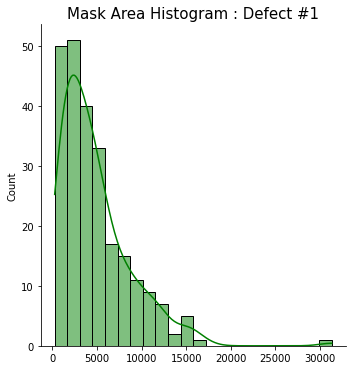

In [ ]:
sns.displot(data=masks_df_worst['Area'].values, kde=True,label='Defect #1',color='g')
plt.title('Mask Area Histogram : Defect #1', fontsize=15)

Text(0.5, 1.0, 'Mask Area Histogram : Defect #1')

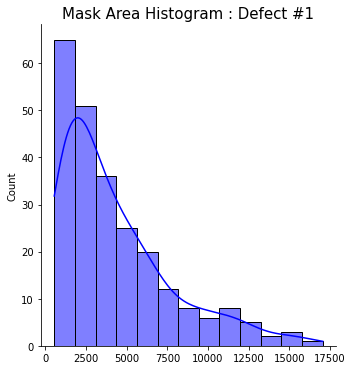

In [ ]:
sns.displot(data=masks_df_best['Area'].values, kde=True,label='Defect #1',color='b')
plt.title('Mask Area Histogram : Defect #1', fontsize=15)

Text(0.5, 1.0, 'Mask Area Histogram : Defect #1')

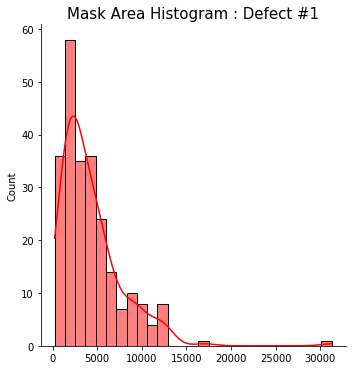

In [ ]:
sns.displot(data=masks_df_medium['Area'].values, kde=True,label='Defect #1',color='r')
plt.title('Mask Area Histogram : Defect #1', fontsize=15)

**Plots analysis for defect-2**

Text(0.5, 1.0, 'Mask Area Histogram : Defect #2')

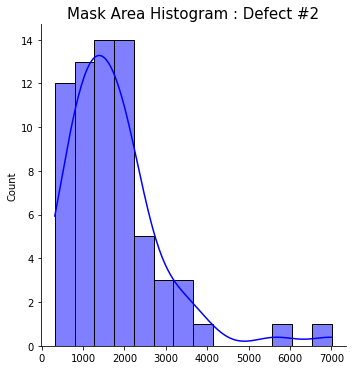

In [ ]:
sns.displot(data=masks_df_medium2['Area'].values, kde=True,label='Defect #2',color='b')
plt.title('Mask Area Histogram : Defect #2', fontsize=15)

Text(0.5, 1.0, 'Mask Area Histogram : Defect #2')

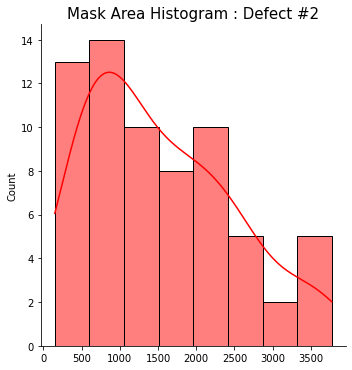

In [ ]:
sns.displot(data=masks_df_best2['Area'].values, kde=True,label='Defect #2',color='r')
plt.title('Mask Area Histogram : Defect #2', fontsize=15)

Text(0.5, 1.0, 'Mask Area Histogram : Defect #2')

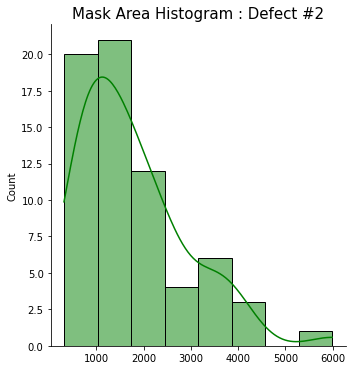

In [ ]:
sns.displot(data=masks_df_worst2['Area'].values, kde=True,label='Defect #2',color='g')
plt.title('Mask Area Histogram : Defect #2', fontsize=15)

**Plots analysis for defect-3**

Text(0.5, 1.0, 'Mask Area Histogram : Defect #3')

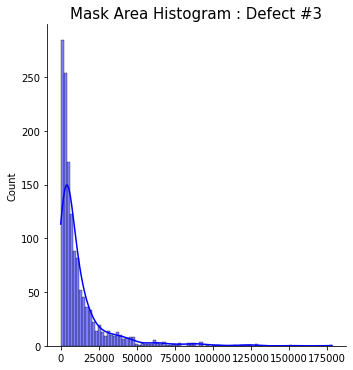

In [ ]:
sns.displot(data=masks_df_medium3['Area'].values, kde=True,label='Defect #3',color='b')
plt.title('Mask Area Histogram : Defect #3', fontsize=15)

Text(0.5, 1.0, 'Mask Area Histogram : Defect #3')

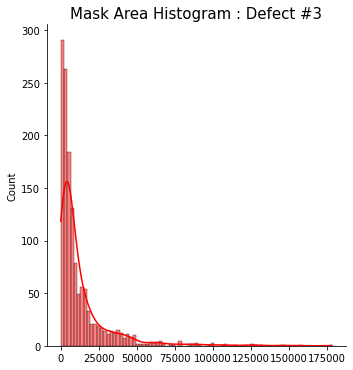

In [ ]:
sns.displot(data=masks_df_best3['Area'].values, kde=True,label='Defect #3',color='r')
plt.title('Mask Area Histogram : Defect #3', fontsize=15)

Text(0.5, 1.0, 'Mask Area Histogram : Defect #3')

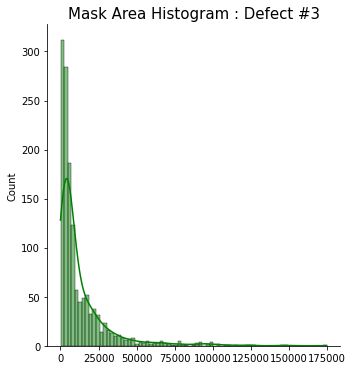

In [ ]:
sns.displot(data=masks_df_worst3['Area'].values, kde=True,label='Defect #3',color='g')
plt.title('Mask Area Histogram : Defect #3', fontsize=15)

**Plots analysis for defect-4**

Text(0.5, 1.0, 'Mask Area Histogram : Defect #4')

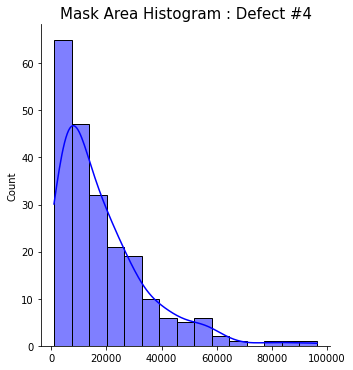

In [ ]:
sns.displot(data=masks_df_medium4['Area'].values, kde=True,label='Defect #4',color='b')
plt.title('Mask Area Histogram : Defect #4', fontsize=15)

Text(0.5, 1.0, 'Mask Area Histogram : Defect #4')

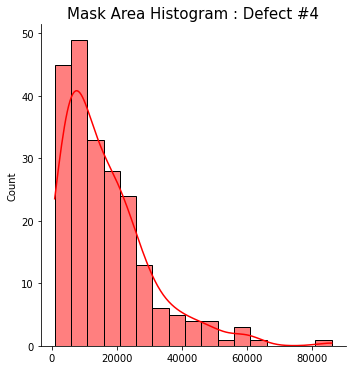

In [ ]:
sns.displot(data=masks_df_best4['Area'].values, kde=True,label='Defect #4',color='r')
plt.title('Mask Area Histogram : Defect #4', fontsize=15)

Text(0.5, 1.0, 'Mask Area Histogram : Defect #4')

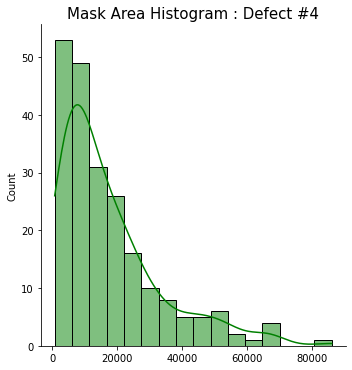

In [ ]:
sns.displot(data=masks_df_worst4['Area'].values, kde=True,label='Defect #4',color='g')
plt.title('Mask Area Histogram : Defect #4', fontsize=15)

**Conclusions on Plots:**

1.Defect-3 and Defect-4 are classified very well by the model and most of the data has good IOU scores.

2.Defect-3 and Defect-3 has large mask areas so the model classified these pixels very well.

3.So in order to get good IOU scores large mask areas are required.

4.Defect-2 has very low IOU scores because of small amount of data.

5.More Data required for defect-1 and defect-2 because of low IOU scores.

6.Proper masking required for defect-1 and defect-2 images.
